# MCMC

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## 蒙特卡洛 均值方法 求积分

利用一个容易进行抽样的分布，根据大数定理可以对函数积分进行估计
$$
\begin{split}
\int_a^b f(x)\mathrm{d}x & = \int_a^b p(x)\frac{f(x)}{p(x)}\mathrm{d}x \\
    & = E_{p(x)}\Big[\frac{f(x)}{p(x)}\Big] \\
    & = \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{p(x_i)} \quad // x_i \sim p(x)
\end{split}
$$

In [2]:
def f(x):
    return 0.3 * np.exp(-(x - 0.3) ** 2) + 0.7 * np.exp(- (x - 2.) ** 2 / 0.3)

In [3]:
## 蒙特卡洛 均值法 求f的积分
def MC(f, low, high, size):
    z = np.random.uniform(low=low, high=high, size=size)
    return np.sum(f(z) * (high - low)) / size

In [4]:
Int_f = MC(f, -2, 4, 10**6)
Int_f

1.2096264268483048

## 拒绝采样

In [5]:
size = 10**4
mean = 1.4
sigma = 1.2
k = 3

In [6]:
## 为了能够使后面的可视化对其曲线，对f(x)进行归一化，用的上面的均值方法
def p(x):
    return f(x) / Int_f
def q(x):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * sigma ** 2))
def sample_q():
    return np.random.normal(loc=mean, scale=sigma)

In [7]:
def reject_sampling(p, q, sample_q, k, size):
    res = []
    it = 0
    ti = 0
    while(it < size):
        z = sample_q()
        qz = q(z)
        u = np.random.uniform(low=0,high=k*qz)
        pz = p(z)
        if u < pz:
            res.append(z)
            it += 1
        ti += 1
    return np.array(res), ti

In [8]:
sample, ti = reject_sampling(p, q, sample_q, k, size)
ti

30301

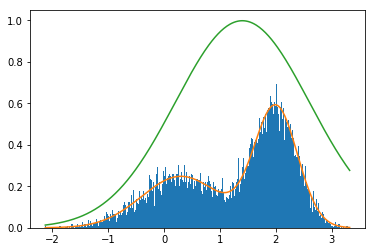

In [9]:
count, bins, ignored = plt.hist(sample, bins=300,density=True)
plt.plot(bins, p(bins))
plt.plot(bins, k * q(bins))

## MCMC

In [17]:
def q(y, x): # q(y|x)
    return 1/(5. - (-2.5))
    
def sample_q(x):
    return np.random.uniform(low=-2.5, high=5.)

In [18]:
def mcmc(p, q, sample_q, size, base_iter=10**2):
    res = []
    it = 0
    x = 0.
    ti = 0
    countable = False
    while it < size + base_iter:
        y = sample_q(x)
        u = np.random.uniform(low=0, high=1)
        if u <= p(y)*q(x, y):
            x = y
            it += 1
            res.append(x)
            if it >= base_iter:
                countable = True
        if countable is True:
            ti += 1
    return np.array(res)[base_iter:], ti

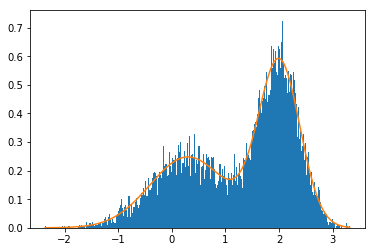

In [19]:
sample, ti = mcmc(p, q, sample_q, 10**4)
count, bins, ignored = plt.hist(sample, bins=300,density=True)
plt.plot(bins, p(bins))

In [20]:
ti

556663

In [21]:
def Metropolis_Hastings(p, q, sample_q, size, base_iter=10**2):
    res = []
    it = 0
    x = 0.
    ti = 0
    countable = False
    while it < size + base_iter:
        y = sample_q(x)
        u = np.random.uniform(low=0., high=1)
        a = min(p(y) / p(x) * q(y, x) / q(x, y), 1)
        if u < a:
            x = y
            it += 1
            res.append(x)
            if it >= base_iter:
                countable = True
        if countable is True:
            ti += 1
    return np.array(res)[base_iter:], ti

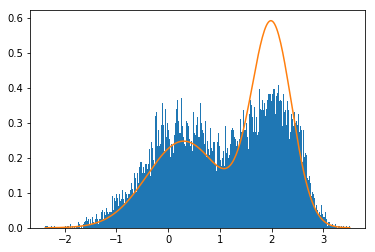

In [22]:
sample, ti = Metropolis_Hastings(p, q, sample_q, 10**4, 10**2)
count, bins, ignored = plt.hist(sample, bins=300,density=True)
plt.plot(bins, p(bins))

In [23]:
ti

27081